### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

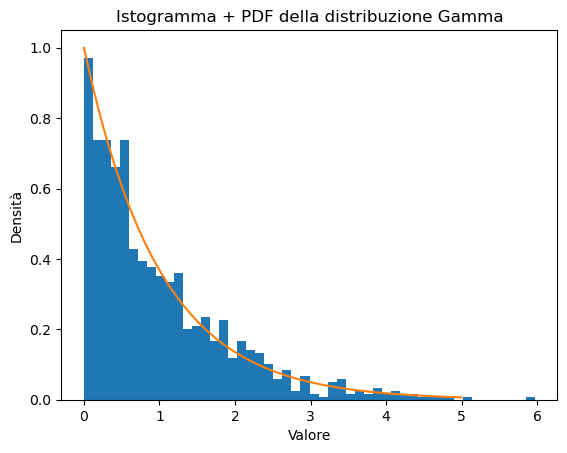

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import gamma

dist = gamma(1)
valori_random = dist.rvs(size=1000) 
plt.hist(valori_random, bins=50, density=True) 
x = np.linspace(0, 5)
plt.plot(x, dist.pdf(x), label='PDF')
plt.title('Istogramma + PDF della distribuzione Gamma')
plt.xlabel('Valore')
plt.ylabel('Densità')
plt.show()


In [26]:
# Fit della distribuzione ai dati
shape_estimate,_,_ = gamma.fit(valori_random)
print(f"Parametro di forma stimato: {shape_estimate:.4f}")

Parametro di forma stimato: 1.0191


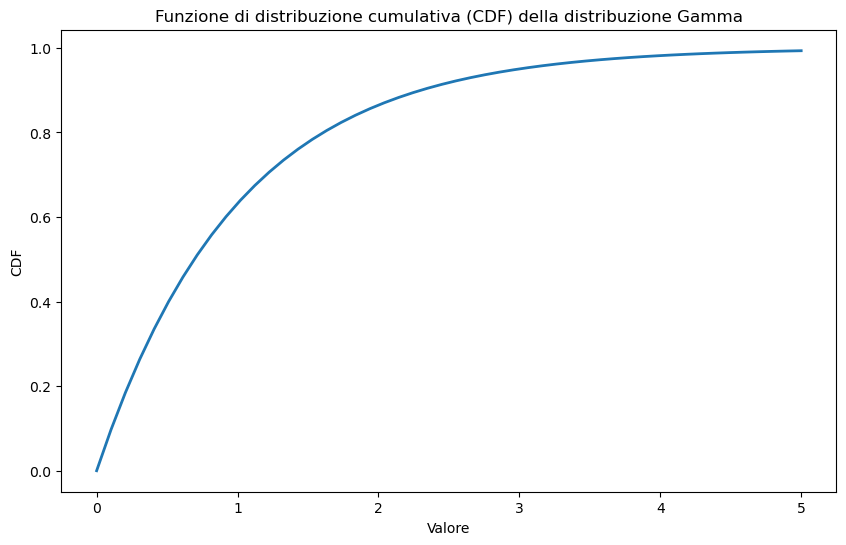

In [29]:
# Calcolo della CDF
cdf = dist.cdf(x)

# Plot della CDF
plt.figure(figsize=(10,6))
plt.plot(x, cdf, lw=2, label='CDF teorica')
plt.title('Funzione di distribuzione cumulativa (CDF) della distribuzione Gamma')
plt.xlabel('Valore')
plt.ylabel('CDF')
plt.show()


In [30]:
# Calcolo della varianza
varianza = np.var(valori_random)

print(f"Varianza campionaria: {varianza:.4f}")


Varianza campionaria: 0.8668


### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

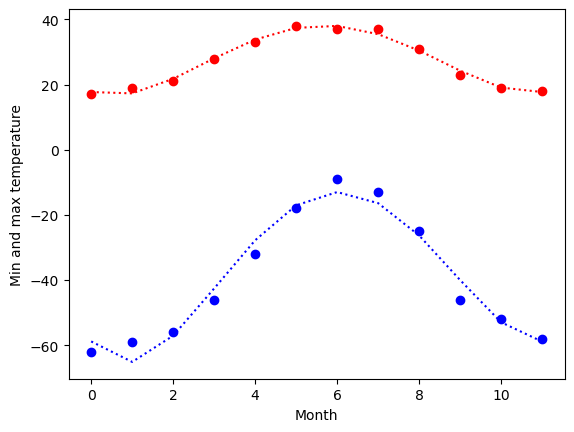

In [3]:
import numpy as np
import matplotlib.pyplot as plt
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")

# --- FIT PARABOLICO ---
# Temp max
coeffs_max_quad = np.polyfit(months, temp_max, 4)
temp_max_quad_fit = np.polyval(coeffs_max_quad, months)
# Temp min
coeffs_min_quad = np.polyfit(months, temp_min, 4)
temp_min_quad_fit = np.polyval(coeffs_min_quad, months)

plt.plot(months, temp_max_quad_fit, 'r:', label="Fit Quadratico Max")
plt.plot(months, temp_min_quad_fit, 'b:', label="Fit Quadratico Min")
plt.show()

In [4]:
def calcola_errori(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return mae, rmse

mae_quad_max, rmse_quad_max = calcola_errori(temp_max, temp_max_quad_fit)
mae_quad_min, rmse_quad_min = calcola_errori(temp_min, temp_min_quad_fit)
print("mae_quad_max : {}".format(mae_quad_max))
print("rmse_quad_max : {}".format(rmse_quad_max))
print("mae_quad_min : {}".format(mae_quad_min))
print("rmse_quad_min : {}".format(rmse_quad_min))

mae_quad_max : 0.7811771561771629
rmse_quad_max : 0.9301038867208512
mae_quad_min : 2.9569735819736844
rmse_quad_min : 3.487912490377805


### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

Equazione della retta: mpg = 29.60 + -0.0412 * disp
R-squared: 0.7183
P-value: 9.3803e-10


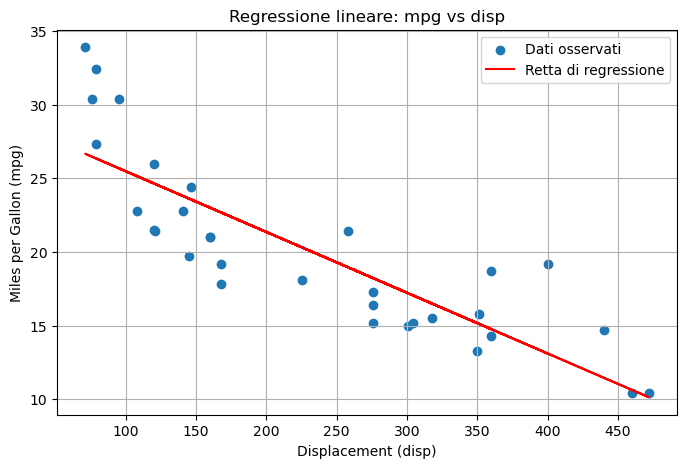

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df

# Estraggo le variabili indipendente e dipendente
x = df['disp'] 
y = df['mpg'] 

# Calcolo della retta di regressione
slope, intercept, r_value, p_value, std_err = sp.linregress(x, y)

print(f"Equazione della retta: mpg = {intercept:.2f} + {slope:.4f} * disp")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4e}")

# Visualizzazione grafica
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Dati osservati')
plt.plot(x, intercept + slope * x, color='red', label='Retta di regressione')
plt.xlabel('Displacement (disp)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Regressione lineare: mpg vs disp')
plt.legend()
plt.grid(True)
plt.show()
